# Calculations for retrospective cohorts
We perform calculations explicitly mentioned in or related to the paper's section titled, "Evaluating expanded molecular profiling and actionability in two retrospective cohorts"

In [1]:
import pandas as pd
import glob as glob

redact_germline = True

## Load MOAlmanac outputs

In [2]:
df = pd.read_csv('retrospective.actionability.txt', sep='\t')
if redact_germline:
    df = df[~df['feature_type'].eq('Germline')]
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
2,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp


In [3]:
df['almanac_bin'].value_counts()

Biologically Relevant        1531
Investigate Actionability    1365
Putatively Actionable         563
Name: almanac_bin, dtype: int64

In [4]:
df['phial_bin'].value_counts()

Biologically Relevant        924
Investigate Actionability    657
Putatively Actionable         81
Name: phial_bin, dtype: int64

In [5]:
df['cohort'].value_counts()

MEL     1831
SU2C    1322
KIRP     532
OS       344
Name: cohort, dtype: int64

## How many patients had > 0 events

In [6]:
idx_almanac = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_mel = df['cohort'].eq('MEL')
idx_su2c = df['cohort'].eq('SU2C')
idx_kirp = df['cohort'].eq('KIRP')
idx_os = df['cohort'].eq('OS')

n_almanac_mel = df[idx_almanac & idx_mel]['patient_id'].drop_duplicates().shape[0]
n_almanac_su2c = df[idx_almanac & idx_su2c]['patient_id'].drop_duplicates().shape[0]
n_almanac_kirp = df[idx_almanac & idx_kirp]['patient_id'].drop_duplicates().shape[0]
n_almanac_os = df[idx_almanac & idx_os]['patient_id'].drop_duplicates().shape[0]
n_phial_mel = df[idx_phial & idx_mel]['patient_id'].drop_duplicates().shape[0]
n_phial_su2c = df[idx_phial & idx_su2c]['patient_id'].drop_duplicates().shape[0]
n_phial_kirp = df[idx_phial & idx_kirp]['patient_id'].drop_duplicates().shape[0]
n_phial_os = df[idx_phial & idx_os]['patient_id'].drop_duplicates().shape[0]

print('Almanac')
print('Mel', n_almanac_mel, n_almanac_mel/110)
print('SU2C', n_almanac_su2c, n_almanac_su2c/150)
print('KIRP', n_almanac_kirp, n_almanac_kirp/100)
print('OS', n_almanac_os, n_almanac_os/59)
print('')
print('PHIAL')
print('Mel', n_phial_mel, n_phial_mel/110)
print('SU2C', n_phial_su2c, n_phial_su2c/150)
print('KIRP', n_phial_kirp, n_phial_kirp/100)
print('OS', n_phial_os, n_phial_os/59)

Almanac
Mel 109 0.990909090909091
SU2C 149 0.9933333333333333
KIRP 85 0.85
OS 50 0.847457627118644

PHIAL
Mel 101 0.9181818181818182
SU2C 131 0.8733333333333333
KIRP 27 0.27
OS 36 0.6101694915254238


## How many somatic variants and copy number alterations were called

In [7]:
idx_v = df['feature_type'].eq('Somatic variant')
idx_cn = df['feature_type'].eq('Somatic copy number')
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_b = df['almanac_bin'].eq('Biologically Relevant')

idx = (idx_a) & (idx_v | idx_cn)
tmp = df[idx]
print(tmp.shape)
tmp.head()

(1445, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
5,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
7,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
9,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp


In [8]:
print(tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']].sum())
tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']]

453


Putatively Actionable         79
Investigate Actionability    374
Name: phial_bin, dtype: int64

In [9]:
n_almanac_pa_ia = tmp['almanac_bin'].value_counts().sum()
n_almanac_phial_pa_ia = tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']].sum()
fraction_almanac_phial_pa_ia = (n_almanac_phial_pa_ia / n_almanac_pa_ia)*100
n_almanac_phial_br = tmp['phial_bin'].value_counts().loc['Biologically Relevant']

In [10]:
f"Of the {n_almanac_pa_ia} somatic variants and copy number alterations noted by MOAlmanac, \
{n_almanac_phial_pa_ia} ({fraction_almanac_phial_pa_ia}%) were highlighted for putative actionability or \
investigate actionability by PHIAL, with an additional {n_almanac_phial_br} noted by PHIAL for biological relevance."

'Of the 1445 somatic variants and copy number alterations noted by MOAlmanac, 453 (31.349480968858128%) were highlighted for putative actionability or investigate actionability by PHIAL, with an additional 390 noted by PHIAL for biological relevance.'

## Restricting considered features
Features considered: Somatic variants, copy number alterations  
Evidence considered: FDA-approved, clinical trials, or clinical evidence  
Matches considered: First putatively actionable and then also investigate actionability

In [11]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(412, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
5,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
9,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
36,KIRP-2Z-A9JD,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
39,KIRP-2Z-A9JD,EGFR.Amplification,Putatively Actionable,NaN,1,KIRP,Clinical evidence,NaN,NaN,NaN,Somatic copy number,EGFR Amp
42,KIRP-2Z-A9JD,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,TP_2061,PIK3CA.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Clinical trial,NaN,NaN,NaN,Somatic copy number,PIK3CA Amp
4013,TP_2061,PTEN.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,Preclinical,Clinical evidence,NaN,NaN,Somatic copy number,PTEN Del
4014,TP_2061,RB1.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,RB1 Del
4018,TP_2061,TP53.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,TP53 Del


In [12]:
pa_patients = tmp['patient_id'].drop_duplicates()

In [13]:
n_events = tmp.shape[0]
n_patients = pa_patients.shape[0]
n_patients_mel = tmp[tmp['cohort'].eq('MEL')]['patient_id'].drop_duplicates().shape[0]
n_patients_su2c = tmp[tmp['cohort'].eq('SU2C')]['patient_id'].drop_duplicates().shape[0]
n_patients_kirp = tmp[tmp['cohort'].eq('KIRP')]['patient_id'].drop_duplicates().shape[0]
n_patients_os = tmp[tmp['cohort'].eq('OS')]['patient_id'].drop_duplicates().shape[0]
n_phial = tmp['phial_bin'].dropna().shape[0]
frac = round((n_phial / n_events)*100, 2)
tmp['phial_bin'].value_counts()

Investigate Actionability    167
Putatively Actionable         60
Name: phial_bin, dtype: int64

In [14]:
f"MOAlmanac identified {n_events} such putatively actionable events from {n_patients} ({n_patients_mel} melanoma, \
{n_patients_su2c} mCRPC, {n_patients_kirp} KIRP, {n_patients_os} OS), {n_phial} ({frac}%) of which were flagged by PHIAL for clinical relevance"

'MOAlmanac identified 412 such putatively actionable events from 253 (73 melanoma, 118 mCRPC, 37 KIRP, 25 OS), 227 (55.1%) of which were flagged by PHIAL for clinical relevance'

In [15]:
for label, group in tmp.groupby('cohort'):
    print(label)
    print(group['feature_string'].value_counts().head())
    print('')

KIRP
MET.Amplification       18
EGFR.Amplification      16
BRAF.Amplification      16
ERBB2.Amplification      5
PIK3CA.Amplification     3
Name: feature_string, dtype: int64

MEL
BRAF.p.V600E         39
PTEN.Deletion         9
MET.Amplification     9
NRAS.p.Q61R           8
NRAS.p.Q61L           7
Name: feature_string, dtype: int64

OS
RB1.Deletion          12
TP53.Deletion          8
MYC.Amplification      5
PTEN.Deletion          3
CDK4.Amplification     3
Name: feature_string, dtype: int64

SU2C
AR.Amplification     82
PTEN.Deletion        40
RB1.Deletion         21
MYC.Amplification    14
TP53.Deletion        10
Name: feature_string, dtype: int64



In [16]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(1180, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
5,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
7,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
9,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
12,KIRP-2Z-A9J2,ARID1A.p.CP1657fs,Investigate Actionability,NaN,1,KIRP,Preclinical,NaN,Clinical evidence,NaN,Somatic variant,ARID1A
14,KIRP-2Z-A9J2,BCR.p.E306D,Investigate Actionability,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic variant,BCR
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,TP_2061,RB1.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,RB1 Del
4018,TP_2061,TP53.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,TP53 Del
4021,TP_2064,AR.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Guideline,Guideline,NaN,NaN,Somatic copy number,AR Amp
4023,TP_2064,BLM.p.V54I,Investigate Actionability,NaN,1,SU2C,NaN,NaN,Clinical evidence,NaN,Somatic variant,BLM


In [17]:
ia_patients = tmp['patient_id'].drop_duplicates()
diff_patients = pd.Index(ia_patients).difference(pd.Index(pa_patients))
len(diff_patients)

93

In [18]:
total_n_patients = 110 + 150 + 100 + 59
round(len(diff_patients) / total_n_patients, 3)

0.222

In [19]:
tmp[tmp['almanac_bin'].eq('Investigate Actionability')]['feature_string'].value_counts()

ESR1.Deletion      11
NRAS.p.Q61K        10
BRAF.p.E611*        5
BRAF.p.D594Y        5
TP53.p.R175H        4
                   ..
PRPF8.p.E2322K      1
TP53.p.G266E        1
TP53.p.C238Y        1
ASXL1.p.L1170fs     1
RET.p.E480K         1
Name: feature_string, Length: 693, dtype: int64

In [20]:
tmp[tmp['feature_string'].eq('NRAS.p.Q61K')]['patient_id'].drop_duplicates().shape[0]

10

In [21]:
tmp[~tmp['phial_bin'].isnull() & tmp['patient_id'].isin(diff_patients) & tmp['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])]['patient_id'].drop_duplicates().shape

(43,)

## How many events did PHIAL call that Almanac didn't?

In [22]:
target = pd.read_excel('../knowledge-bases/target/almanac-comparison.xlsx')
tmp = df[df['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability']) & df['almanac_bin'].isnull()]
tmp['gene'] = tmp['feature_string'].str.split('.').apply(lambda x: x[0])
tmp['gene'].isin(target[target['included_in_lift_to_moalmanac'].eq(0)]).value_counts()

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    225
Name: gene, dtype: int64

In [23]:
tmp['phial_bin'].value_counts()

Investigate Actionability    223
Putatively Actionable          2
Name: phial_bin, dtype: int64

In [24]:
tmp[tmp['phial_bin'].eq('Putatively Actionable')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple,gene
2646,MO_1232,KRAS.p.Q61H,NaN,Putatively Actionable,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,KRAS,KRAS
2647,MO_1232,KRAS.p.Q61L,NaN,Putatively Actionable,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,KRAS,KRAS


## Expanding evidence
Features considered: Somatic variants, copy number alterations  
Evidence considered: Preclinical  
Matches considered: Putatively actionable

In [25]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['Preclinical']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp.head()

(164, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
56,KIRP-2Z-A9JG,MDM2.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,NaN,NaN,Somatic copy number,MDM2 Amp
84,KIRP-2Z-A9JP,FGFR1.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,NaN,NaN,Somatic copy number,FGFR1 Amp
97,KIRP-2Z-A9JQ,KEAP1.Deletion,Putatively Actionable,NaN,1,KIRP,NaN,Preclinical,NaN,NaN,Somatic copy number,KEAP1 Del


In [26]:
n_events = tmp.shape[0]
n_patients = tmp['patient_id'].drop_duplicates().shape[0]
n_phial = tmp['phial_bin'].dropna().shape[0]

In [27]:
f"On the basis of preclinical evidence, {n_events} such events \
from {n_patients} patients were identified-- --{n_phial} ({round(100*(n_phial / n_events), 2)}%) \
of which were also highlighted by PHIAL."

'On the basis of preclinical evidence, 164 such events from 140 patients were identified-- --91 (55.49%) of which were also highlighted by PHIAL.'

Features considered: Somatic variants, copy number alterations  
Evidence considered: Inferential  
Matches considered: Putatively actionable

In [28]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['Inferential']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp.head()

(24, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
136,KIRP-4A-A93Y,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
308,KIRP-A4-8630,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
358,KIRP-AL-3466,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
470,KIRP-B9-4117,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
483,KIRP-B9-5155,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp


In [29]:
tmp['feature_string'].value_counts()

CCND1.Amplification    15
ERBB2.Amplification     5
CDKN2C.Deletion         3
CD274.Amplification     1
Name: feature_string, dtype: int64

In [30]:
n_events = tmp.shape[0]
n_patients = tmp['patient_id'].drop_duplicates().shape[0]
f"Inferential evidence {n_events} additional putatively actionable copy number alterations from {n_patients} patients, \
most prominently CCND1 amplifications for reported sensitivity to Palbocicilib."

'Inferential evidence 24 additional putatively actionable copy number alterations from 24 patients, most prominently CCND1 amplifications for reported sensitivity to Palbocicilib.'

## In total for somatic variants and copy number alterations
Features considered: Somatic variants, copy number alterations  
Evidence considered: FDA-approved, clinical trials, clinical evidence, preclinical, inferential  
Matches considered: Putatively actionable, Investigate actionability

In [31]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence', 'Preclinical', 'Inferential']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(1445, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
5,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
7,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
9,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,TP_2064,AR.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Guideline,Guideline,NaN,NaN,Somatic copy number,AR Amp
4022,TP_2064,AURKA.Amplification,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
4023,TP_2064,BLM.p.V54I,Investigate Actionability,NaN,1,SU2C,NaN,NaN,Clinical evidence,NaN,Somatic variant,BLM
4026,TP_2064,MPL.p.A134T,Investigate Actionability,Biologically Relevant,2,SU2C,Preclinical,NaN,NaN,NaN,Somatic variant,MPL


In [32]:
total_n = 0
for label, group in tmp.groupby('cohort'):
    total_n += group['patient_id'].drop_duplicates().shape[0]
    print(label, group['patient_id'].drop_duplicates().shape[0])
print(total_n)

KIRP 72
MEL 109
OS 42
SU2C 142
365


In [33]:
tmp['phial_bin'].value_counts()

Biologically Relevant        390
Investigate Actionability    374
Putatively Actionable         79
Name: phial_bin, dtype: int64

In [34]:
tmp['phial_bin'].value_counts().divide(tmp.shape[0])

Biologically Relevant        0.269896
Investigate Actionability    0.258824
Putatively Actionable        0.054671
Name: phial_bin, dtype: float64

## Validation sequencing

In [35]:
handles = (glob.glob('2015-Robinson/data/*/*/*.actionable.txt') + 
           glob.glob('2015-VanAllen/data/*/*/*.actionable.txt') + 
           glob.glob('2016-TCGA/data/*/*/*.actionable.txt') + 
           glob.glob('2014-Perry/data/*/*/*.actionable.txt')
          )
tmp = pd.concat([pd.read_csv(handle, sep='\t') for handle in handles], ignore_index=True)
tmp = tmp[tmp['feature_type'].eq('Somatic Variant') & tmp['score_bin'].isin(['Putatively Actionable', 'Investigate Actionability - High', 'Investigate Actionability - Low']) & ~tmp['validation_total_coverage'].isnull()]
tmp

,score_bin,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,feature_type,feature,alteration_type,alteration,tumor_f,total_coverage,...,prognostic_url,number_germline_mutations_in_gene,validation_total_coverage,validation_tumor_f,validation_detection_power,feature_display,preclinical_efficacy_observed,patient_id,tumor_sample_barcode,normal_sample_barcode
70,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.T878A,0.6073,219.0,...,NaN,1.0,1921.0,0.9724,1.0000,AR p.T878A (Missense),NaN,SC_9065,SC_9065-Tumor,SC_9065-NB
119,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.T878A,0.4224,232.0,...,NaN,NaN,290.0,0.4759,1.0000,AR p.T878A (Missense),NaN,PROS01448-1115161,PROS01448-1115161-Tumor-SM-5SGU1,PROS01448-1115161-Normal-SM-6CAJL
137,Putatively Actionable,Preclinical,NaN,Clinical trial,Somatic Variant,PIK3CA,Missense,p.E545K,0.3825,217.0,...,https://doi.org/10.1200/JCO.2017.75.7310,NaN,21.0,0.2857,0.9799,PIK3CA p.E545K (Missense),1.0,MO_1410,MO_1410-Tumor,MO_1410-Normal
369,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.5703,128.0,...,NaN,NaN,21.0,0.7619,0.9998,AR p.L702H (Missense),NaN,PROS12319B-SU2C-06115114,PROS12319B-SU2C-06115114-Tumor-SM-4W2N9,PROS12319B-SU2C-06115114-Normal-SM-4W2NS
424,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.0800,50.0,...,NaN,NaN,4.0,0.0000,0.0002,AR p.L702H (Missense),NaN,PROS01448-6115250,PROS01448-6115250-Tumor-SM-67ES4,PROS01448-6115250-Normal-SM-67ET3
442,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.5806,31.0,...,NaN,NaN,33.0,0.9394,1.0000,AR p.L702H (Missense),NaN,PROS01448-1115244,PROS01448-1115244-Tumor-SM-5SGU6,PROS01448-1115244-Normal-SM-6CAJP
510,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.1190,210.0,...,NaN,1.0,81.0,0.2222,0.9822,AR p.L702H (Missense),NaN,PROS01448-6115219,PROS01448-6115219-Tumor-SM-67ERS,PROS01448-6115219-Normal-SM-67ESS
533,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.2063,63.0,...,NaN,2.0,1305.0,0.5586,1.0000,AR p.L702H (Missense),NaN,MO_1316,MO_1316-TM,MO_1316-NB
564,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.8983,59.0,...,NaN,NaN,66.0,1.0000,1.0000,AR p.L702H (Missense),NaN,PROS01448-6115227,PROS01448-6115227-Tumor-SM-67ERU,PROS01448-6115227-Normal-SM-67ESU
699,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.0758,356.0,...,NaN,1.0,640.0,0.1125,1.0000,AR p.L702H (Missense),NaN,SC_9046,SC_9046-Tumor,SC_9046-Normal


In [36]:
print(tmp[tmp['validation_detection_power'].ge(0.80)].shape)

(29, 41)


In [37]:
tmp[tmp['validation_detection_power'].ge(0.80)]['feature_display'].value_counts()

BRAF p.V600E (Missense)      11
AR p.L702H (Missense)         6
AR p.T878A (Missense)         5
NRAS p.Q61R (Missense)        2
AKT1 p.E17K (Missense)        2
KRAS p.G12D (Missense)        1
NRAS p.Q61L (Missense)        1
PIK3CA p.E545K (Missense)     1
Name: feature_display, dtype: int64

## Extended features
Features considered: Germline variants, fusions, mutational burden, mutational signatures, aneuploidy  
Evidence considered: FDA-approved, clinical trials, or clinical evidence  
Matches considered: First putatively actionable and then also investigate actionability

In [38]:
idx_f = df['feature_type'].isin(['Germline', 'Rearrangement', 'Aneuploidy', 
                                 'Tumor mutational burden', 'Mutational signature'])
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])

tmp = df[idx_f & idx_a]
print(tmp.shape)
tmp.head()

(483, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
19,KIRP-2Z-A9J5,COSMIC Signature 3,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 3
28,KIRP-2Z-A9J7,COSMIC Signature 2,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 2
33,KIRP-2Z-A9J9,COSMIC Signature 3,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 3
52,KIRP-2Z-A9JG,COSMIC Signature 5,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 5


In [39]:
n_cr_total = n_almanac_mel + n_almanac_su2c + n_almanac_kirp + n_almanac_os

f"By considering these feature types, MOAlmanac identified an additional {tmp.shape[0]} clinically relevant \
molecular features in {tmp['patient_id'].drop_duplicates().shape[0]} patients, resulting in \
{n_cr_total} patients with at least one event associated with therapeutic sensitivity, resistance, or prognosis."

'By considering these feature types, MOAlmanac identified an additional 483 clinically relevant molecular features in 315 patients, resulting in 393 patients with at least one event associated with therapeutic sensitivity, resistance, or prognosis.'

In [40]:
tmp.shape

(483, 12)

In [41]:
tmp['patient_id'].drop_duplicates().shape

(315,)

In [42]:
tmp_germline = tmp[tmp['feature_type'].eq('Germline') & tmp['clinvar'].isin(['Pathogenic', 'Pathogenic/Likely pathogenic', 'Likely pathogenic'])]
tmp_germline.shape

(0, 12)

In [43]:
tmp_germline['patient_id'].drop_duplicates().shape

(0,)

In [44]:
tmp_germline

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple


In [45]:
tmp_rearrangement = tmp[tmp['feature_type'].eq('Rearrangement')]
print(tmp_rearrangement.shape)
print(tmp_rearrangement['patient_id'].drop_duplicates().shape)

(137, 12)
(91,)


In [46]:
erg_patients = tmp[tmp['feature_string'].eq('TMPRSS2--ERG')]['patient_id'].drop_duplicates()
len(pd.Index(erg_patients).difference(pd.Index(pa_patients)))

10

In [47]:
tmp[tmp['feature_string'].eq('TMPRSS2--ERG')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2371,MO_1008,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2483,MO_1015,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2492,MO_1040,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2503,MO_1071,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2531,MO_1095,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2550,MO_1114,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2556,MO_1118,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2564,MO_1124,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2589,MO_1162,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
2595,MO_1176,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG


In [48]:
tmb = tmp[tmp['feature_string'].eq('High Mutational Burden')]
for label, group in tmb.groupby('cohort'):
    print(label, group['patient_id'].drop_duplicates().shape[0])

MEL 44
SU2C 4


In [49]:
tmp[tmp['feature_type'].eq('Mutational signature')]['patient_id'].drop_duplicates().shape

(116,)

In [50]:
tmp[tmp['feature_type'].eq('Aneuploidy')]['patient_id'].drop_duplicates().shape[0]

180

In [51]:
# Range of additional considerations per patient
print(tmp['patient_id'].value_counts().median())
print(tmp['patient_id'].value_counts().describe())

1.0
count    315.000000
mean       1.533333
std        1.450236
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: patient_id, dtype: float64


In [52]:
tmp.loc[tmp['cohort'].isin(['MEL', 'SU2C']), 'patient_id'].value_counts().median()

1.0

In [53]:
tmp.loc[tmp['cohort'].isin(['MEL', 'SU2C']), 'patient_id'].value_counts().describe()

count    210.000000
mean       1.676190
std        1.725104
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: patient_id, dtype: float64

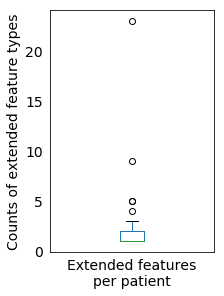

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize = (3, 4), constrained_layout=True)
ax = plt.subplot()
plt.tick_params(axis = 'both', which = 'both',
            top = False, bottom = False, right = False, left = False, 
            labeltop = False, labelbottom = True, labelright = False, labelleft = True)

p = tmp['patient_id'].value_counts().plot.box()
plt.ylabel('Counts of extended feature types', fontsize=14)

ax.set_xticklabels(['Extended features\nper patient'], fontsize = 14)
ax.tick_params(axis='y', which='major', labelsize=14)

plt.show()

## Therapeutic sensitivity by evidence

In [55]:
tmp['patient_id']

3       KIRP-2K-A9WE
19      KIRP-2Z-A9J5
28      KIRP-2Z-A9J7
33      KIRP-2Z-A9J9
52      KIRP-2Z-A9JG
            ...     
3998         TP_2060
4000         TP_2060
4009         TP_2061
4019         TP_2061
4028         TP_2064
Name: patient_id, Length: 483, dtype: object

In [56]:
tmp = df[df['sensitive_predictive_implication'].notnull()]
tmp['sensitive_predictive_implication'].value_counts()

evidence_map = {
    'FDA-Approved': 0,
    'Guideline': 1,
    'Clinical trial': 2,
    'Clinical evidence': 3,
    'Preclinical': 4,
    'Inferential': 5
}

tmp['evidence_map'] = tmp['sensitive_predictive_implication'].replace(evidence_map)
tmp = (tmp
 .loc[:, ['patient_id', 'sensitive_predictive_implication', 'evidence_map']]
 .sort_values('evidence_map')
 .drop_duplicates(subset='patient_id', keep='first')
)

idx_mel = tmp['patient_id'].str.contains('MEL-IPI')
idx_kirp = tmp['patient_id'].str.contains('KIRP')
idx_os = tmp['patient_id'].str.contains('Osteosarcoma')
idx_prad = tmp.index.difference(idx_mel[idx_mel].index.union(idx_kirp[idx_kirp].index).union(idx_os[idx_os].index))
tmp_mel_vcs = tmp[idx_mel]['sensitive_predictive_implication'].value_counts()
tmp_mel_vcs

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


FDA-Approved         70
Clinical evidence    16
Preclinical          10
Guideline             9
Clinical trial        1
Inferential           1
Name: sensitive_predictive_implication, dtype: int64

In [57]:
tmp_mel_vcs['FDA-Approved'] + tmp_mel_vcs['Guideline']

79

In [58]:
tmp_su2c_vcs = tmp.loc[idx_prad, :]['sensitive_predictive_implication'].value_counts()
tmp_su2c_vcs

Guideline         78
FDA-Approved      29
Preclinical       29
Clinical trial     4
Inferential        1
Name: sensitive_predictive_implication, dtype: int64

In [59]:
tmp_su2c_vcs['FDA-Approved'] + tmp_su2c_vcs['Guideline']

107

In [60]:
tmp_kirp_vcs = tmp[idx_kirp]['sensitive_predictive_implication'].value_counts()
tmp_kirp_vcs

Guideline            20
Inferential          18
FDA-Approved         16
Preclinical          16
Clinical evidence     9
Clinical trial        4
Name: sensitive_predictive_implication, dtype: int64

In [61]:
tmp_kirp_vcs['FDA-Approved'] + tmp_kirp_vcs['Guideline']

36

In [62]:
tmp_os_vcs = tmp[idx_os]['sensitive_predictive_implication'].value_counts()
tmp_os_vcs

Preclinical          17
Inferential           9
FDA-Approved          5
Guideline             4
Clinical trial        2
Clinical evidence     1
Name: sensitive_predictive_implication, dtype: int64

In [63]:
tmp_os_vcs['FDA-Approved'] + tmp_os_vcs['Guideline']

9

In [64]:
(
tmp_mel_vcs['FDA-Approved'] + tmp_mel_vcs['Guideline'] +
tmp_su2c_vcs['FDA-Approved'] + tmp_su2c_vcs['Guideline'] +
tmp_kirp_vcs['FDA-Approved'] + tmp_kirp_vcs['Guideline'] + 
tmp_os_vcs['FDA-Approved'] + tmp_os_vcs['Guideline']
)

231

In [65]:
110 + 150 + 100 + 59

419

In [66]:
tmp['sensitive_predictive_implication'].value_counts()

FDA-Approved         120
Guideline            111
Preclinical           72
Inferential           29
Clinical evidence     26
Clinical trial        11
Name: sensitive_predictive_implication, dtype: int64

In [67]:
patients_fda_guideline = tmp[tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])]['patient_id'].tolist()
patients_all = tmp['patient_id'].tolist()
patients_fda_guideline_clinical = tmp[tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence'])]['patient_id'].tolist()
patients_preclinical = tmp[tmp['sensitive_predictive_implication'].isin(['Preclinical'])]['patient_id'].tolist()
patients_inferential = tmp[tmp['sensitive_predictive_implication'].isin(['Inferential'])]['patient_id'].tolist()



In [68]:
patients_all = tmp['patient_id'].tolist()

In [69]:
tmp = df[df['sensitive_predictive_implication'].notnull() & df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])]
tmp['sensitive_predictive_implication'].value_counts()

evidence_map = {
    'FDA-Approved': 0,
    'Guideline': 1,
    'Clinical trial': 2,
    'Clinical evidence': 3,
    'Preclinical': 4,
    'Inferential': 5
}

tmp['evidence_map'] = tmp['sensitive_predictive_implication'].replace(evidence_map)
tmp = (tmp
 .loc[:, ['patient_id', 'sensitive_predictive_implication', 'evidence_map']]
 .sort_values('evidence_map')
 .drop_duplicates(subset='patient_id', keep='first')
)

patients_fda_guideline_somatic = (tmp[
    tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])]['patient_id'].tolist())

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [70]:
tmp_patients = pd.Index(patients_fda_guideline).difference(pd.Index(patients_fda_guideline_somatic))
print(tmp_patients)
print(tmp_patients.shape)

Index(['KIRP-2Z-A9JJ', 'MEL-IPI_Pat06', 'Osteosarcoma-CCM201',
       'Osteosarcoma-IAS513', 'Osteosarcoma-RCP466', 'Osteosarcoma-WABS378',
       'PROS01448-1115244', 'SC_9034', 'SC_9066', 'SC_9086', 'TP_2032',
       'TP_2060'],
      dtype='object')
(12,)


In [71]:
tmp = (df[df['patient_id'].isin(tmp_patients) 
          & df['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])])
tmp

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
65,KIRP-2Z-A9JJ,EML4--ALK,Putatively Actionable,NaN,1,KIRP,Guideline,NaN,NaN,NaN,Rearrangement,EML4--ALK
580,MEL-IPI_Pat06,COL1A1--TGM2,Investigate Actionability,NaN,1,MEL,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--TGM2
2820,Osteosarcoma-CCM201,COL1A1--MMP9,Investigate Actionability,NaN,1,OS,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--MMP9
2846,Osteosarcoma-IAS513,NTRK2--AUH,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,NTRK2--AUH
2931,Osteosarcoma-RCP466,COL1A1--USP6,Investigate Actionability,NaN,1,OS,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--USP6
3067,Osteosarcoma-WABS378,ABL1--TTF1,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,ABL1--TTF1
3119,PROS01448-1115244,COL1A1--KLK3,Investigate Actionability,NaN,1,SU2C,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--KLK3
3493,SC_9034,COL1A1--CPE,Investigate Actionability,NaN,1,SU2C,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--CPE
3703,SC_9066,CDK5RAP2--COL1A1,Investigate Actionability,NaN,1,SU2C,Guideline,NaN,NaN,NaN,Rearrangement,CDK5RAP2--COL1A1
3704,SC_9066,COL1A1--C1R,Investigate Actionability,NaN,1,SU2C,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--C1R


In [72]:
tmp['feature_string'].value_counts()

COL1A1--C1R              1
COL1A1--LRP1             1
COL1A1--TGM2             1
COL1A1--KLK3             1
CDK5RAP2--COL1A1         1
MT-RNR2--COL1A1          1
COL1A1--BCL2L2-PABPN1    1
ABL1--TTF1               1
COL1A1--CPE              1
EML4--ALK                1
NTRK2--AUH               1
COL1A1--USP6             1
COL1A1--MT-CO2           1
COL1A1--MMP9             1
Name: feature_string, dtype: int64

In [73]:
tmp[tmp['feature_string'].str.contains('NTRK')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2846,Osteosarcoma-IAS513,NTRK2--AUH,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,NTRK2--AUH


In [74]:
(pd.Index(patients_preclinical)
 .difference(pd.Index(patients_fda_guideline_clinical))
 .shape
)

(72,)

In [75]:
(pd.Index(patients_inferential)
 .difference(pd.Index(patients_fda_guideline_clinical))
 .difference(pd.Index(patients_preclinical))
 .shape
)

(29,)

In [76]:
(df[df['patient_id'].isin(patients_preclinical) & df['sensitive_predictive_implication'].eq('Preclinical')]['feature_string']
 .value_counts()
 .head()
)

PTEN.Deletion          18
CDKN2A.Deletion        14
TMPRSS2--ERG           11
AURKB.Amplification     4
FGFR2.Deletion          3
Name: feature_string, dtype: int64

## Table of sample counts by assertion type, evidence, and match

In [77]:
(df[(df['cohort'].eq('KIRP') &
 df['almanac_bin'].isin(['Investigate Actionability', 'Putatively Actionable']) &
 df['prognostic_predictive_implication'].isin(['Guideline'])
)]
#.shape
#['patient_id'].value_counts()
['feature_type'].value_counts()
)

Somatic variant        17
Somatic copy number     3
Name: feature_type, dtype: int64

In [78]:
df['patient_id']

0       KIRP-2K-A9WE
1       KIRP-2K-A9WE
2       KIRP-2K-A9WE
3       KIRP-2K-A9WE
4       KIRP-2K-A9WE
            ...     
4024         TP_2064
4025         TP_2064
4026         TP_2064
4027         TP_2064
4028         TP_2064
Name: patient_id, Length: 4029, dtype: object

In [79]:
columns = df.columns[df.columns.str.contains('predictive_implication')]

evidence_columns = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence', 'Preclinical', 'Inferential']
match_columns = ['Putatively Actionable', 'Investigate Actionability', 'Biologically Relevant']
types_columns = ['Somatic variant', 'Somatic copy number', 'Germline', 'Rearrangement', 'Mutational signature', 'Tumor mutational burden', 'Aneuploidy']

outname = 'retrospective.feature_types_by_evidence.xlsx'

with pd.ExcelWriter(outname) as writer: 
    for label, group in df.groupby('cohort'):
        for column in columns:
            sheetname = '{} {} profile counts'.format(label, column.split('_')[0])
            (
                df[df[column].isin(evidence_columns) & df['cohort'].eq(label)]
                .loc[:, ['patient_id', 'feature_type', column]]
                .drop_duplicates()
                .pivot_table(index='feature_type', columns=column, values='patient_id', aggfunc=lambda x: len(x.unique()))
                .reindex(evidence_columns, axis=1)
                .reindex(types_columns)
                .fillna(0)
                .astype(int)
                .to_excel(writer, sheet_name=sheetname)
            )

## In conclusion

In [80]:
n_size = {
    'KIRP': 100,
    'MEL': 110,
    'SU2C': 150,
    'OS': 59
}

tmp = df[df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])]
for label, group in tmp.groupby('cohort'):
    print(label, 
          group['patient_id'].drop_duplicates().shape[0], 
          round(group['patient_id'].drop_duplicates().shape[0] / n_size[label], 3)
         )

KIRP 85 0.85
MEL 109 0.991
OS 50 0.847
SU2C 149 0.993


In [81]:
tmp = df[df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])]
for label, group in tmp.groupby('cohort'):
    print(label, 
          group['patient_id'].drop_duplicates().shape[0], 
          round(group['patient_id'].drop_duplicates().shape[0] / n_size[label], 3)
         )

KIRP 27 0.27
MEL 101 0.918
OS 36 0.61
SU2C 131 0.873


## Figure 2 caption

In [82]:
idx_v = df['feature_type'].eq('Somatic variant')
idx_cn = df['feature_type'].eq('Somatic copy number')
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_p = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])

idx = (idx_a) & (idx_v | idx_cn)
tmp = df[idx]['patient_id'].drop_duplicates()
print(tmp.shape)

idx = (idx_p) & (idx_v | idx_cn)
tmp = df[idx]['patient_id'].drop_duplicates()
print(tmp.shape)

(365,)
(295,)


In [83]:
df[idx & df['almanac_bin'].isnull()]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
15,KIRP-2Z-A9J3,FGFR1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,FGFR1 Del
49,KIRP-2Z-A9JE,SMARCA4.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,SMARCA4 Del
50,KIRP-2Z-A9JG,ABL1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ABL1 Del
89,KIRP-2Z-A9JP,SMARCA4.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,SMARCA4 Del
107,KIRP-2Z-A9JR,EWSR1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,EWSR1 Del
...,...,...,...,...,...,...,...,...,...,...,...,...
3963,TP_2001,MITF.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,MITF Del
3976,TP_2010,TMPRSS2.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,TMPRSS2 Del
3979,TP_2020,AR.p.Q58L,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,AR
3983,TP_2020,NOTCH2.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,NOTCH2 Del


In [84]:
unique_patients_preclinical = (pd.Index(patients_preclinical)
                               .difference(pd.Index(patients_fda_guideline_clinical))
                              )

In [85]:
(
    df[df['patient_id'].isin(
        pd.Index(patients_preclinical)
        .difference(pd.Index(patients_fda_guideline_clinical))
    )]
 .loc[:, ['patient_id', 'cohort']]
 .drop_duplicates()
 .loc[:, 'cohort']
 .value_counts()
)

SU2C    29
OS      17
KIRP    16
MEL     10
Name: cohort, dtype: int64

In [86]:
df

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
2,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
...,...,...,...,...,...,...,...,...,...,...,...,...
4024,TP_2064,COSMIC Signature 1,Biologically Relevant,NaN,1,SU2C,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 1
4025,TP_2064,COSMIC Signature 6,Biologically Relevant,NaN,1,SU2C,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 6
4026,TP_2064,MPL.p.A134T,Investigate Actionability,Biologically Relevant,2,SU2C,Preclinical,NaN,NaN,NaN,Somatic variant,MPL
4027,TP_2064,TP53.p.H179R,Investigate Actionability,Investigate Actionability,2,SU2C,NaN,Guideline,Guideline,NaN,Somatic variant,TP53


In [87]:
!mkdir -p ../../tables/supplementary-table-03

outname = '../../tables/supplementary-table-03/supplementary-table-3.xlsx'
with pd.ExcelWriter(outname) as writer:
    df.drop('sum', axis=1).to_excel(writer, sheet_name='MOAlmanac & PHIAL calls', index=False)
    counts = pd.read_csv('retrospective.counts-by-category.txt', sep='\t')
    counts.to_excel(writer, sheet_name='summarized counts', index=False)